## Student Performance Indicator

- This project understands how the students performance (test score) is effected by other variables such as Gender , Ethnicity , Parental level of education , Lunch and Test preparation course.

## Import data & Required packages

### Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import CSV file

In [2]:
df = pd.read_csv('../data/StudentsPerformance.csv')

### Dataset Preview (Top 5 Rows)

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Dataset Shape (Rows & Columns)

In [4]:
df.shape

(1000, 8)

# Dataset Information

- gender : sex of student -> (male/female)
- race/ethnicity : ethnicity of students -> (Group A,B,C,D)
- parental level of education : final education
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score


# Data Checks to Perform

- check missing value
- check duplicates
- check data type
- check number of unique values of each column
- check statistics of data set
- check various categories present in the different categorical column

#### 1. Check Missing Values

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### There are no missing values in data set

#### 2. Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

##### There are no duplicate values in data set

#### 3. Check data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 4. Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 5. Check Statistics of data set

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

- Most students perform better in Reading and Writing compared to Math
- The dataset has some extreme outliers (e.g., Math = 0)
- Scores are fairly balanced, with median close to mean

#### 6. Exploring Data

In [10]:
print("Categories in 'gender' variable :" , end="  " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable :" , end="  " )
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable :" , end="  " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable :" , end="  " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable :" , end="  " )
print(df['test preparation course'].unique())

Categories in 'gender' variable :  ['female' 'male']
Categories in 'race/ethnicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :  ['standard' 'free/reduced']
Categories in 'test preparation course' variable :  ['none' 'completed']


In [11]:
# define numerical & categorical column
numeric_feature= { feature for feature in df.columns if df[feature].dtype != 'O'}
categorical_feature= { feature for feature in df.columns if df[feature].dtype == 'O'}

# print columns
print("We have {} numerical features: {}".format(len(numeric_feature) , numeric_feature))
print("We have {} categorical features: {}".format(len(categorical_feature) , categorical_feature))

We have 3 numerical features: {'reading score', 'math score', 'writing score'}
We have 5 categorical features: {'lunch', 'parental level of education', 'race/ethnicity', 'gender', 'test preparation course'}


#### 7. Adding columns for "Total Score" and "Average"

In [12]:
df["Total Score"] = df["math score"] + df["reading score"] + df["writing score"]
df["Average"] = df["Total Score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df["reading score"] == 100]["Average"].count()
writing_full = df[df["writing score"] == 100]["Average"].count()
math_full = df[df["math score"] == 100]["Average"].count()

print(f'Number of students with full marks in math : {math_full}')
print(f'Number of students with full marks in reading : {reading_full}')
print(f'Number of students with full marks in writing : {writing_full}')

Number of students with full marks in math : 7
Number of students with full marks in reading : 17
Number of students with full marks in writing : 14


In [14]:
reading_less_20 = df[df["reading score"] <= 20]["Average"].count()
writing_less_20 = df[df["writing score"] <= 20]["Average"].count()
math_less_20 = df[df["math score"] <= 20]["Average"].count()

print(f'Number of students with less than 20 marks in math : {math_less_20}')
print(f'Number of students with less than 20 in reading : {reading_less_20}')
print(f'Number of students with less than 20 in writing : {writing_less_20}')

Number of students with less than 20 marks in math : 4
Number of students with less than 20 in reading : 1
Number of students with less than 20 in writing : 3


#### Insights

- From above values we get students have performed the worst in maths
- Best performance is in reading section

# Data Visualization

#### Visualize average score distribution to make some conclusion

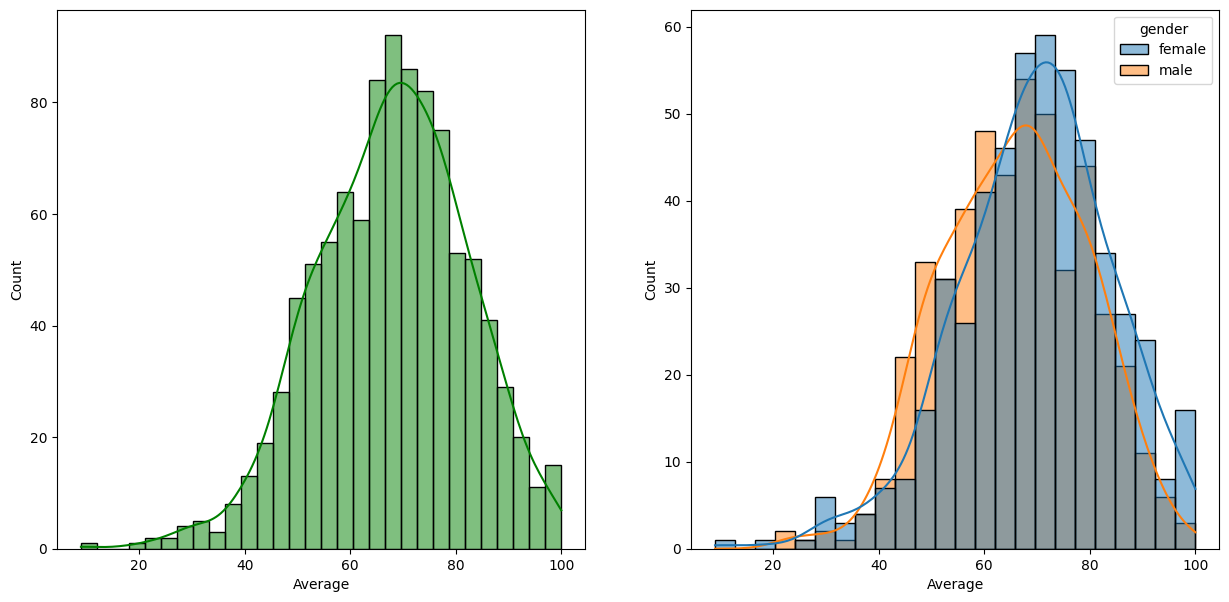

In [15]:
fig , axs = plt.subplots(1 , 2 , figsize=(15 , 7))
plt.subplot(121)
sns.histplot(data=df , x='Average' , bins=30 , kde=True , color='g')
plt.subplot(122)
sns.histplot(data=df , x='Average' , kde=True , hue='gender')
plt.show()

#### Insights

- Female students tend to perform well then male students

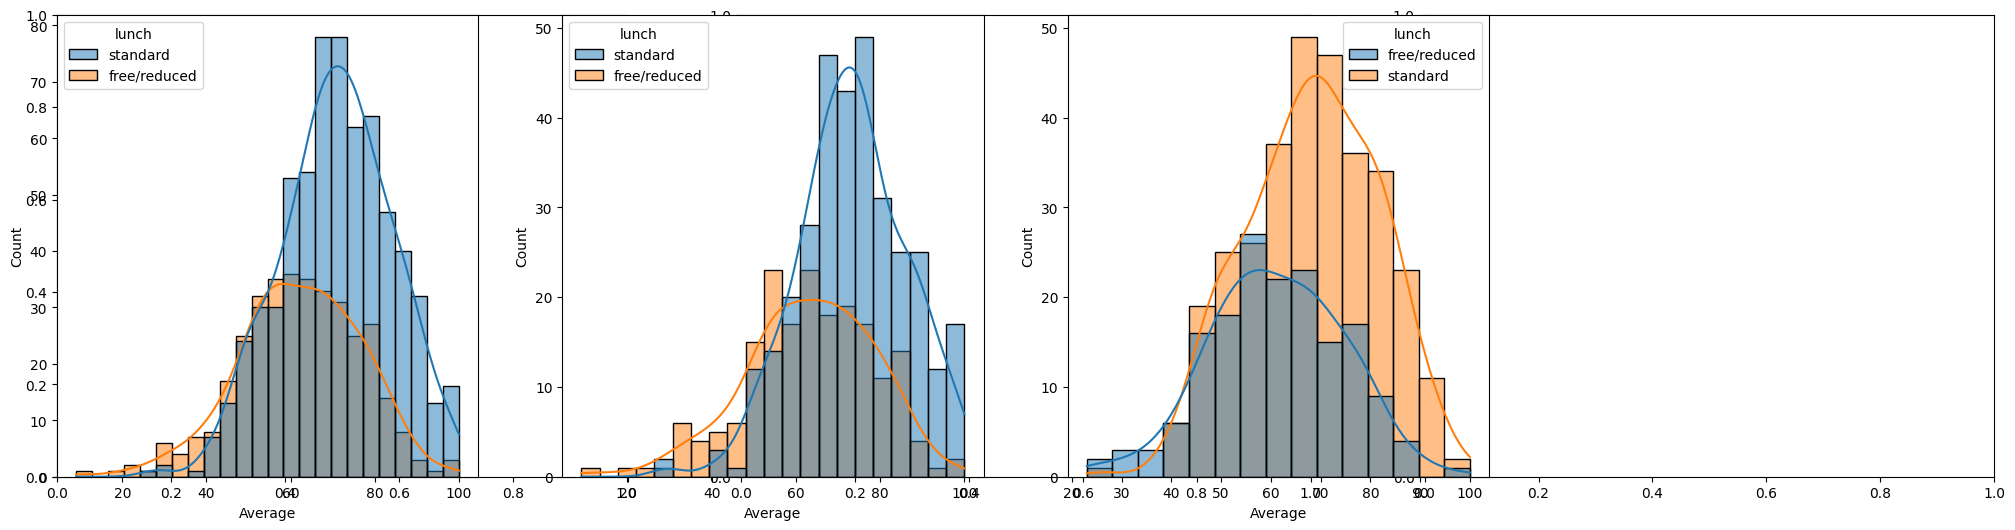

In [16]:
plt.subplots(1 , 3 , figsize=(25 , 6))
plt.subplot(141)
sns.histplot(data=df , x='Average' , kde=True , hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'] , x='Average' , kde=True , hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'] , x='Average' , kde=True , hue='lunch')
plt.show()

#### Insights

- Standard lunch helps perform well in exam
- Standard lunch hepls perform well in exam be it a male or female

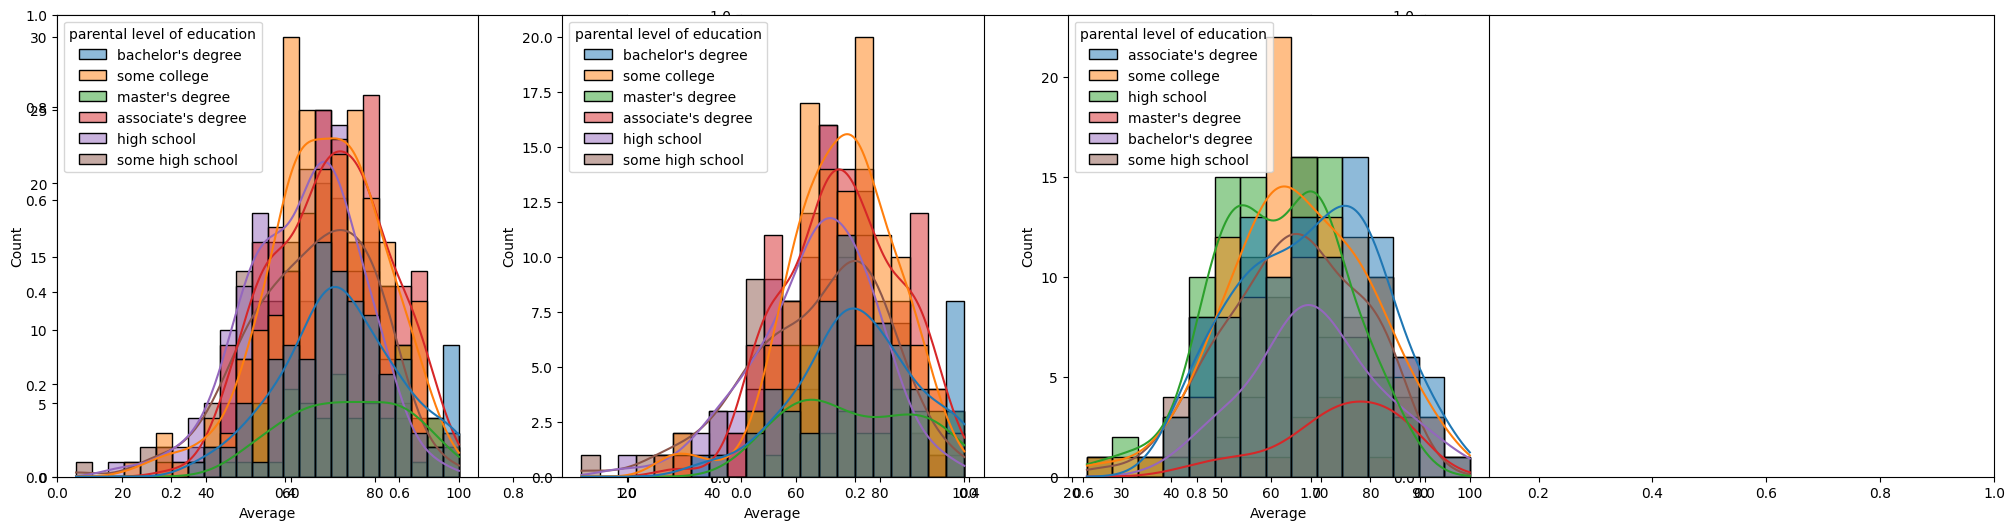

In [17]:
plt.subplots(1 , 3 , figsize=(25 , 6))
plt.subplot(141)
sns.histplot(data=df , x='Average' , kde=True , hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'] , x='Average' , kde=True , hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'] , x='Average' , kde=True , hue='parental level of education')
plt.show()

#### Insight

- In general parent's education don't help student perform well in exam

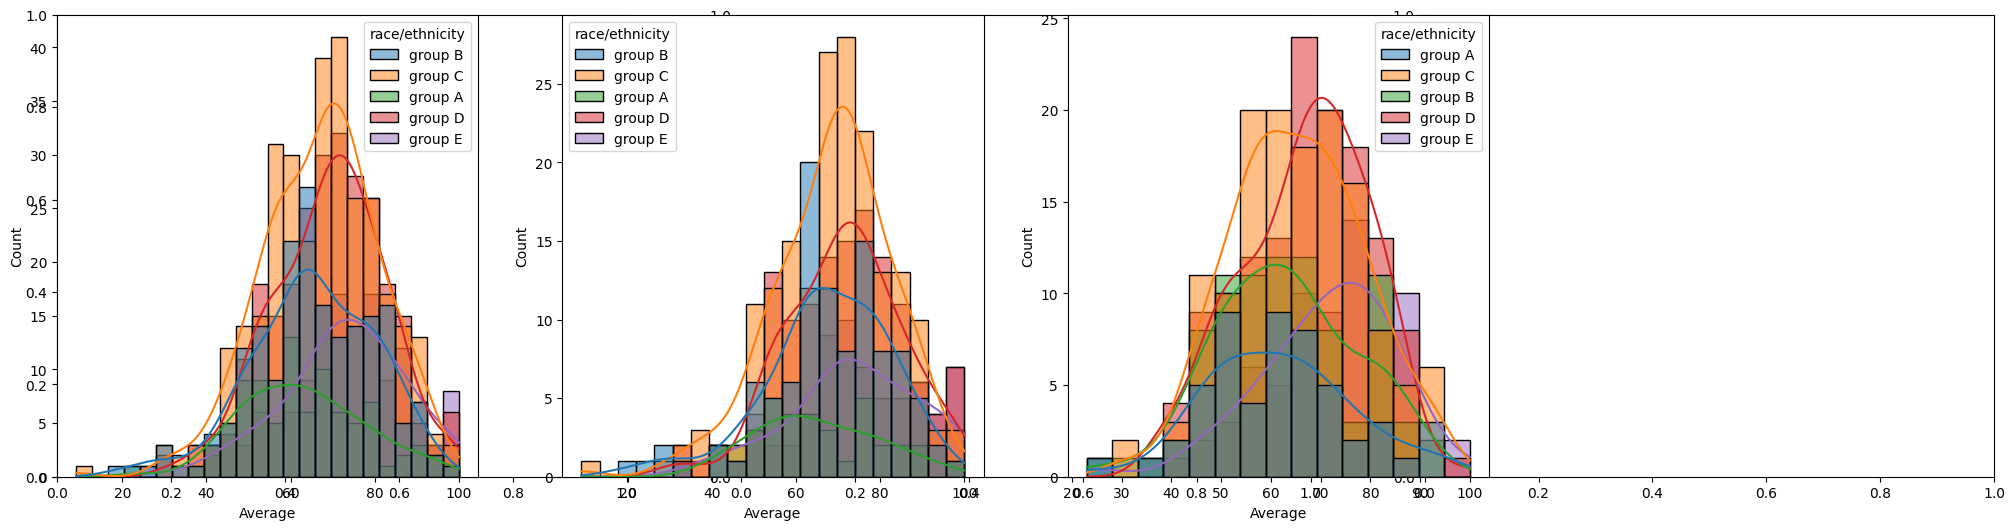

In [18]:
plt.subplots(1 , 3 , figsize=(25 , 6))
plt.subplot(141)
sns.histplot(data=df , x='Average' , kde=True , hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'] , x='Average' , kde=True , hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'] , x='Average' , kde=True , hue='race/ethnicity')
plt.show()

#### Insight

- Student of group A and group B tend to perform poorly in exam irrespective of whether they are male or female

## Maximum score of students in all three exams

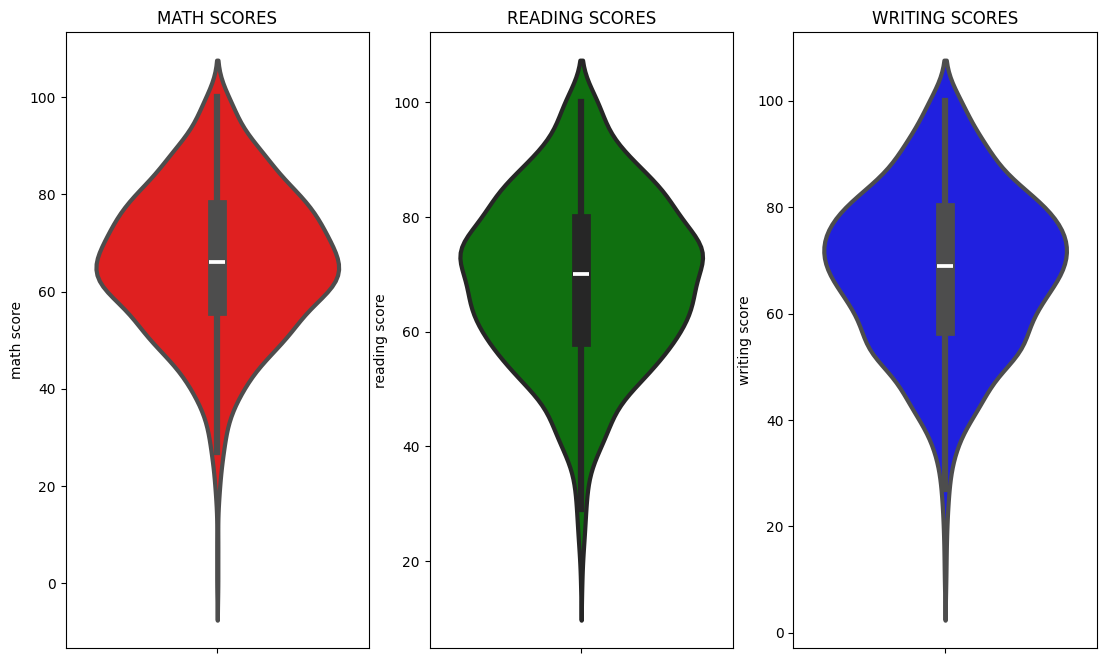

In [19]:
plt.figure(figsize=(18 , 8))
plt.subplot(141)
plt.title('MATH SCORES')
sns.violinplot(data=df , y='math score' , color='red' , linewidth=3)
plt.subplot(142)
plt.title('READING SCORES')
sns.violinplot(data=df , y='reading score' , color='green' , linewidth=3)
plt.subplot(143)
plt.title('WRITING SCORES')
sns.violinplot(data=df , y='writing score' , color='blue' , linewidth=3)
plt.show()

#### Insight

- From the above three plots its clearly visible thata most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Multivariate analysis using pieplot

<function matplotlib.pyplot.show(close=None, block=None)>

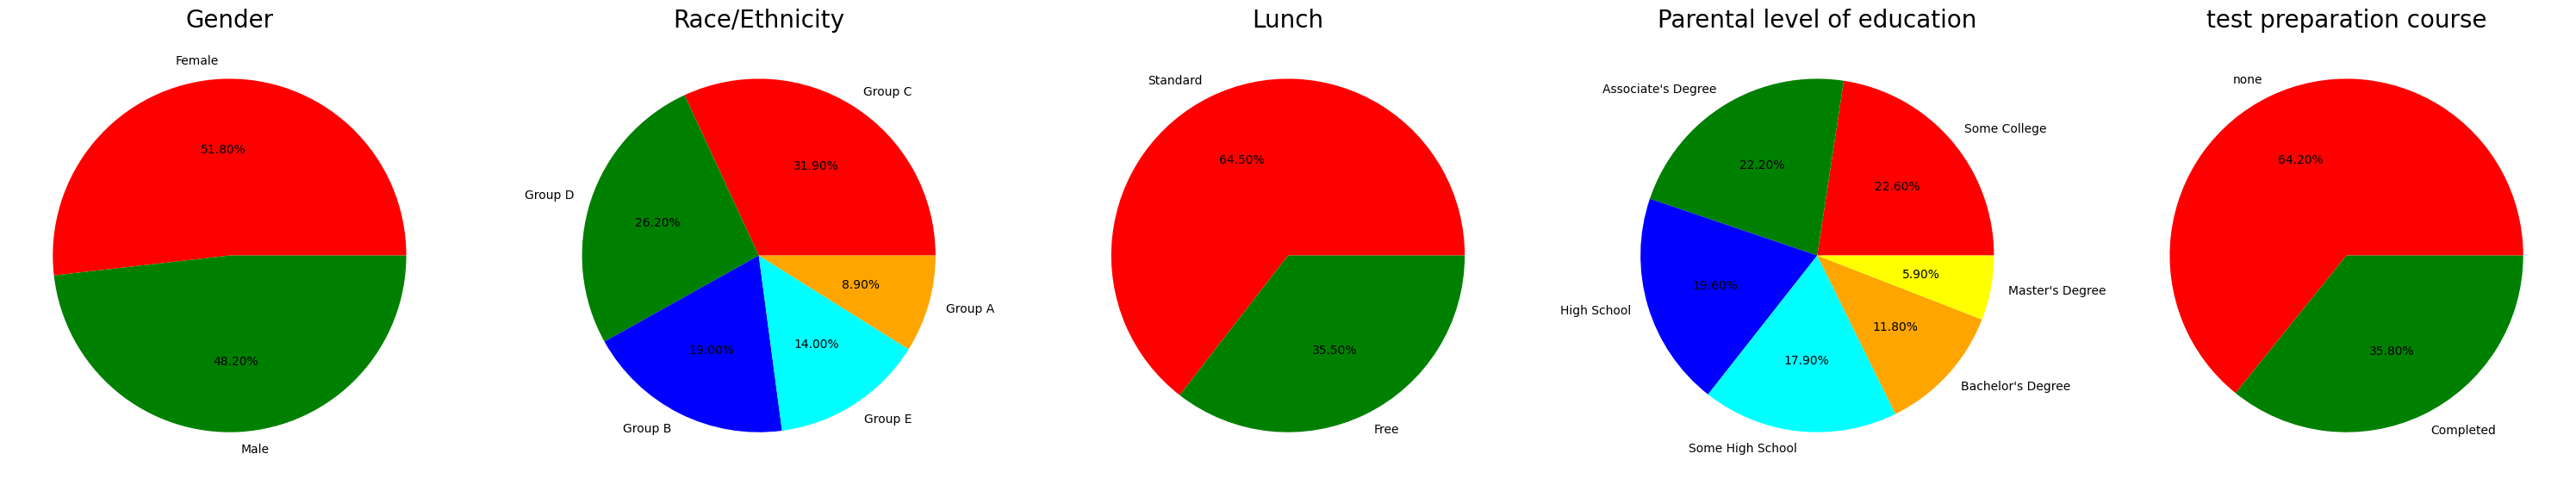

In [20]:
plt.figure(figsize=(30 , 12))

plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female' , 'Male'
color = ['red' , 'green']

plt.pie(size , colors=color , labels=labels , autopct= '%1.2f%%')
plt.title('Gender' , fontsize = 20)
plt.axis('off')

plt.subplot(152)
size = df['race/ethnicity'].value_counts()
labels = 'Group C' , 'Group D' , 'Group B' , 'Group E' , 'Group A'
color = ['red' , 'green' , 'blue' , 'cyan' , 'orange']

plt.pie(size , colors=color , labels=labels , autopct='%1.2f%%')
plt.title('Race/Ethnicity' , fontsize=20)
plt.axis('off')

plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'Standard' , 'Free'
color = ['red' , 'green']

plt.pie(size , colors=color , labels=labels , autopct= '%1.2f%%')
plt.title('Lunch' , fontsize = 20)
plt.axis('off')

plt.subplot(154)
size = df['parental level of education'].value_counts()
labels = 'Some College' , "Associate's Degree" , "High School" , "Some High School" , "Bachelor's Degree" , "Master's Degree"
color = ['red' , 'green' , 'blue' , 'cyan' , 'orange' , 'yellow' ]

plt.pie(size , colors=color , labels=labels , autopct= '%1.2f%%')
plt.title('Parental level of education' , fontsize = 20)
plt.axis('off')

plt.subplot(155)
size = df['test preparation course'].value_counts()
labels = 'none' , "Completed" 
color = ['red' , 'green']

plt.pie(size , colors=color , labels=labels , autopct= '%1.2f%%')
plt.title('test preparation course' , fontsize = 20)
plt.axis('off')

plt.tight_layout()

plt.show

#### Insight

- Number of Male and Female students is almost equal
- Number of students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associatie's Degree"
- Number of students who have not enrolled in any test preparation course is greater

## Feature wise Visualization

### 1. Gender Column

- How is distribution of Gender?
- Is gender has any impact on student's performance?

### Univariate Analysis (How is distribution of Gender ?)

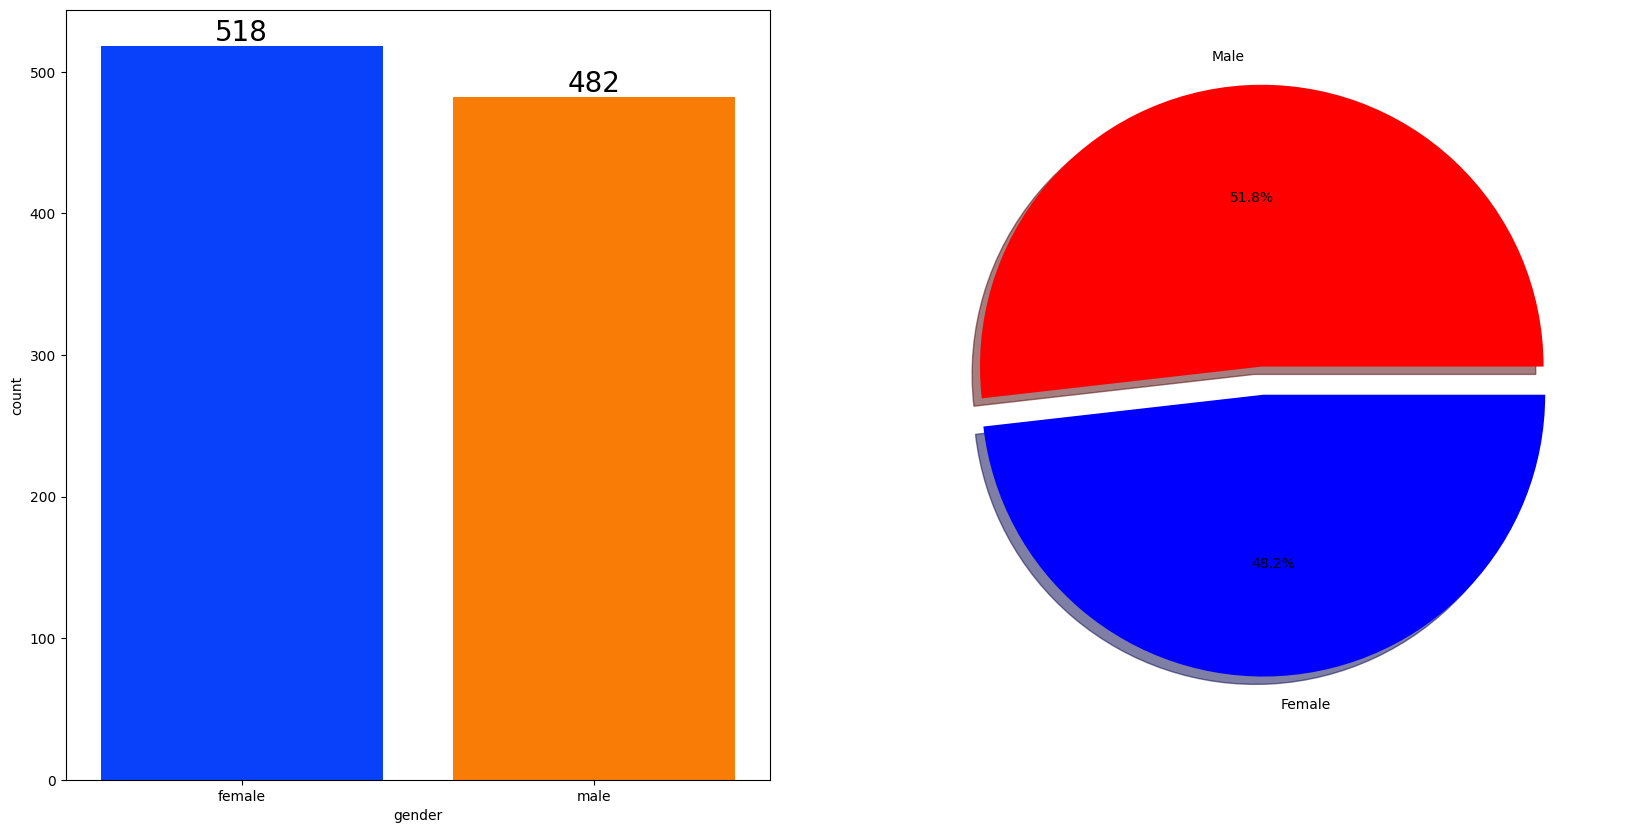

In [21]:
f , ax = plt.subplots(1 , 2 , figsize=(20 , 10))
sns.countplot(x=df['gender'] , data=df , palette='bright' , ax=ax[0] , saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container , color='black' , size=20)

plt.pie(x=df['gender'].value_counts() , labels= ['Male' , 'Female'] , explode=[0.1 , 0] , autopct='%1.1f%%' , shadow=True , colors=['red' , 'blue'])
plt.show()

#### Insight|

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ?)

In [22]:
gender_group = df.groupby('gender').mean(numeric_only=True)
print(gender_group)

        math score  reading score  writing score  Total Score    Average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


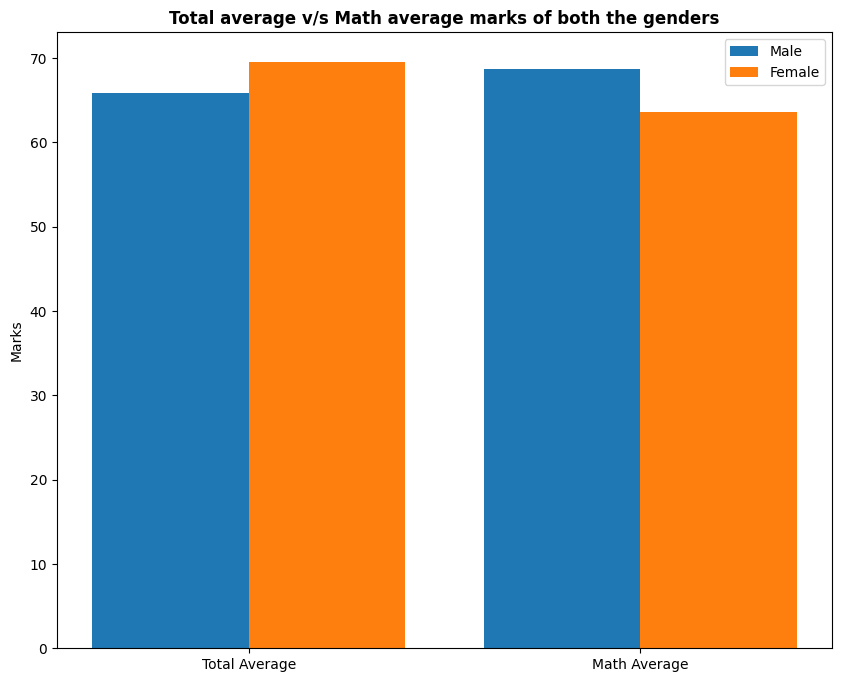

In [23]:
plt.figure(figsize=(10 , 8))
X = ['Total Average' , 'Math Average']

female_score = [
    gender_group.loc['female', 'Average'],
    gender_group.loc['female', 'math score']
]
 
male_score = [
    gender_group.loc['male', 'Average'],
    gender_group.loc['male', 'math score']
]


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2 , male_score , 0.4 , label = 'Male')
plt.bar(X_axis + 0.2 , female_score , 0.4 , label = 'Female')

plt.xticks(X_axis , X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders" , fontweight='bold')
plt.legend()
plt.show()

#### Insight

- On an average females have a better overall score than men
- Whereas males have scored higher in Maths

### Race/Ethnicity Column

- How is Group wise distribution?
- Is Race/Ethnicity has any impact on student's performance?

### UNIVARIATE ANALYSIS (How is Group wise distribution?)

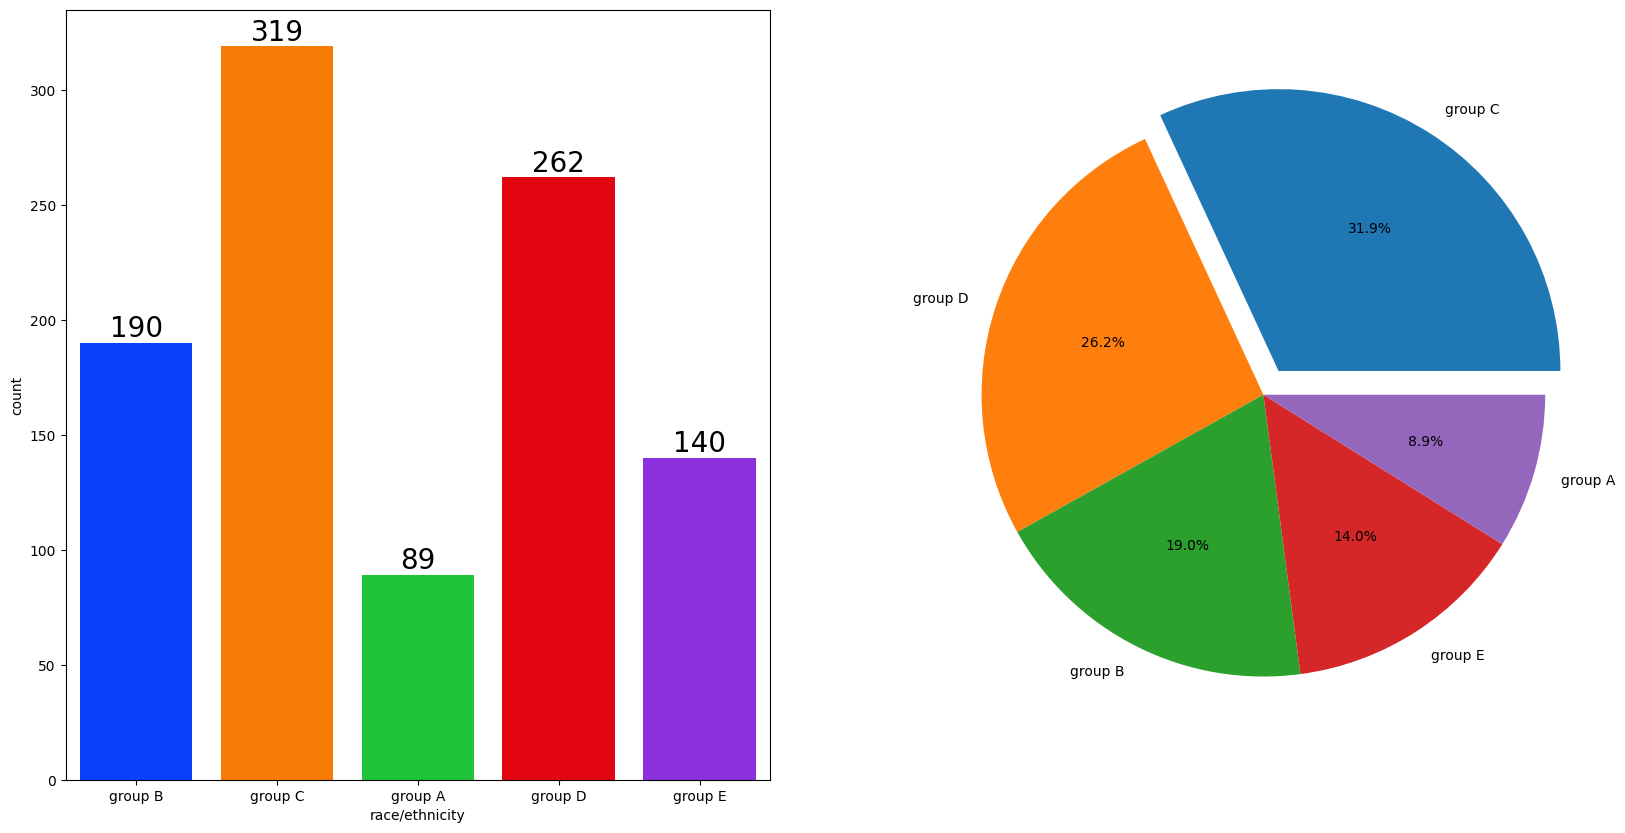

In [24]:
f , ax = plt.subplots(1 , 2 , figsize=(20 , 10))
sns.countplot(x=df['race/ethnicity'] , data=df , palette= 'bright' , ax=ax[0] , saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container , color= 'black' , size=20)

plt.pie(
    x=df['race/ethnicity'].value_counts(),
    labels=df['race/ethnicity'].value_counts().index,
    explode=[0.1, 0, 0, 0, 0],  
    autopct='%1.1f%%'
)
plt.show()

#### Insight

- Most of the student belonging to group C/ group D
- Lowest number of students belong to group A

### BIVARIATE ANALYSIS (Is race/ethnicity has any impact on student's performance)

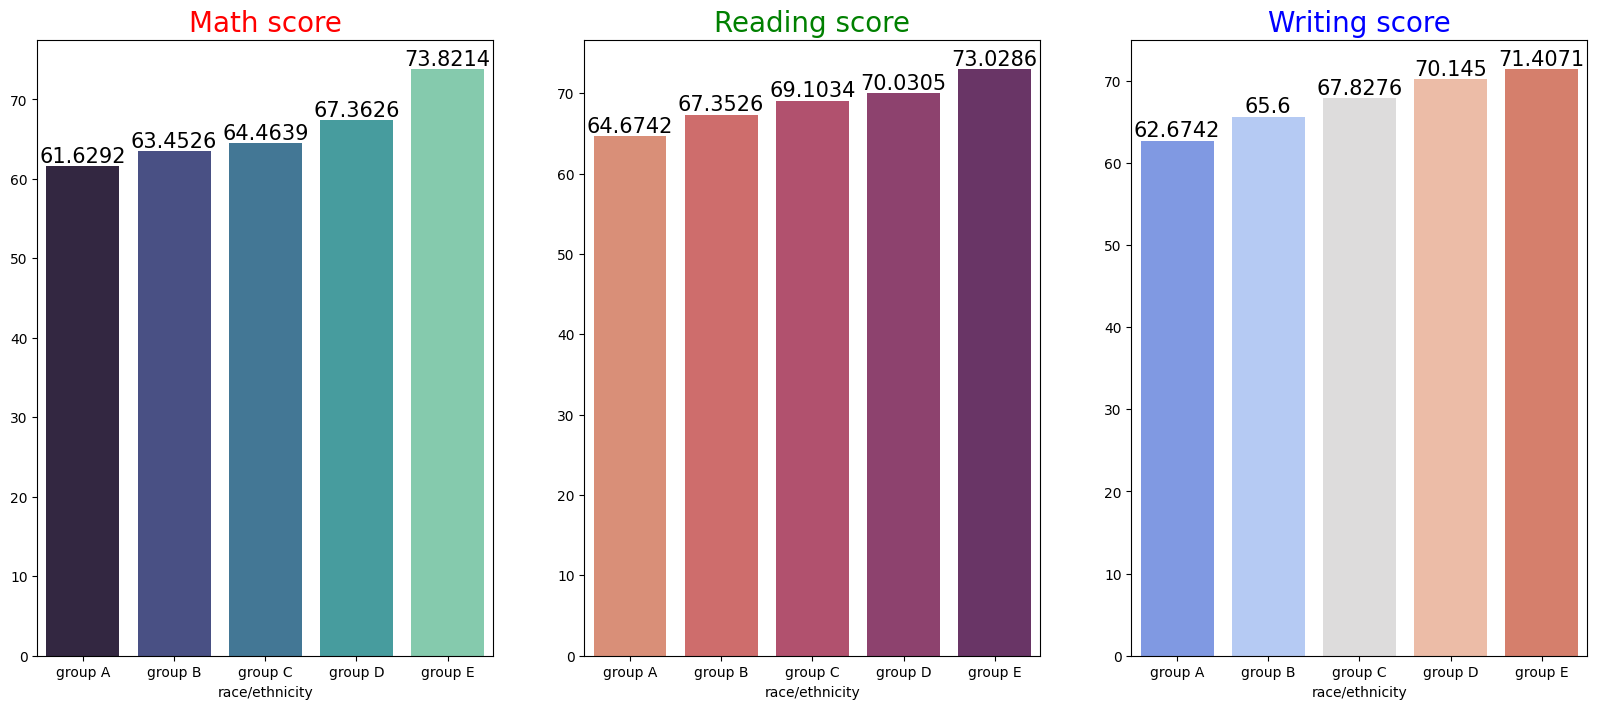

In [25]:
Group_data2 = df.groupby('race/ethnicity')
f , ax = plt.subplots(1 , 3 , figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index , y=Group_data2['math score'].mean().values , palette= 'mako' , ax=ax[0])
ax[0].set_title('Math score' , color='red' , size = 20)

for container in ax[0].containers:
    ax[0].bar_label(container , color='black' , size=15)

sns.barplot(x=Group_data2['reading score'].mean().index , y=Group_data2['reading score'].mean().values , palette= 'flare' , ax=ax[1])
ax[1].set_title('Reading score' , color='green' , size = 20)

for container in ax[1].containers:
    ax[1].bar_label(container , color='black' , size=15)

sns.barplot(x=Group_data2['writing score'].mean().index , y=Group_data2['writing score'].mean().values , palette= 'coolwarm' , ax=ax[2])
ax[2].set_title('Writing score' , color='blue' , size = 20)

for container in ax[2].containers:
    ax[2].bar_label(container , color='black' , size=15)

#### Insight

- Group E students have scored the highest marks
- Group A students have scored the lowest marks 
- Students from a lower Socioeconomics status have a lower avg in all course subjects

### Parental level of education column

- What is educational background of student's parent?
- Is parental education has any impact on student's performance?

### UNIVARIATE ANALYSIS (What is educational background of student's parent?)

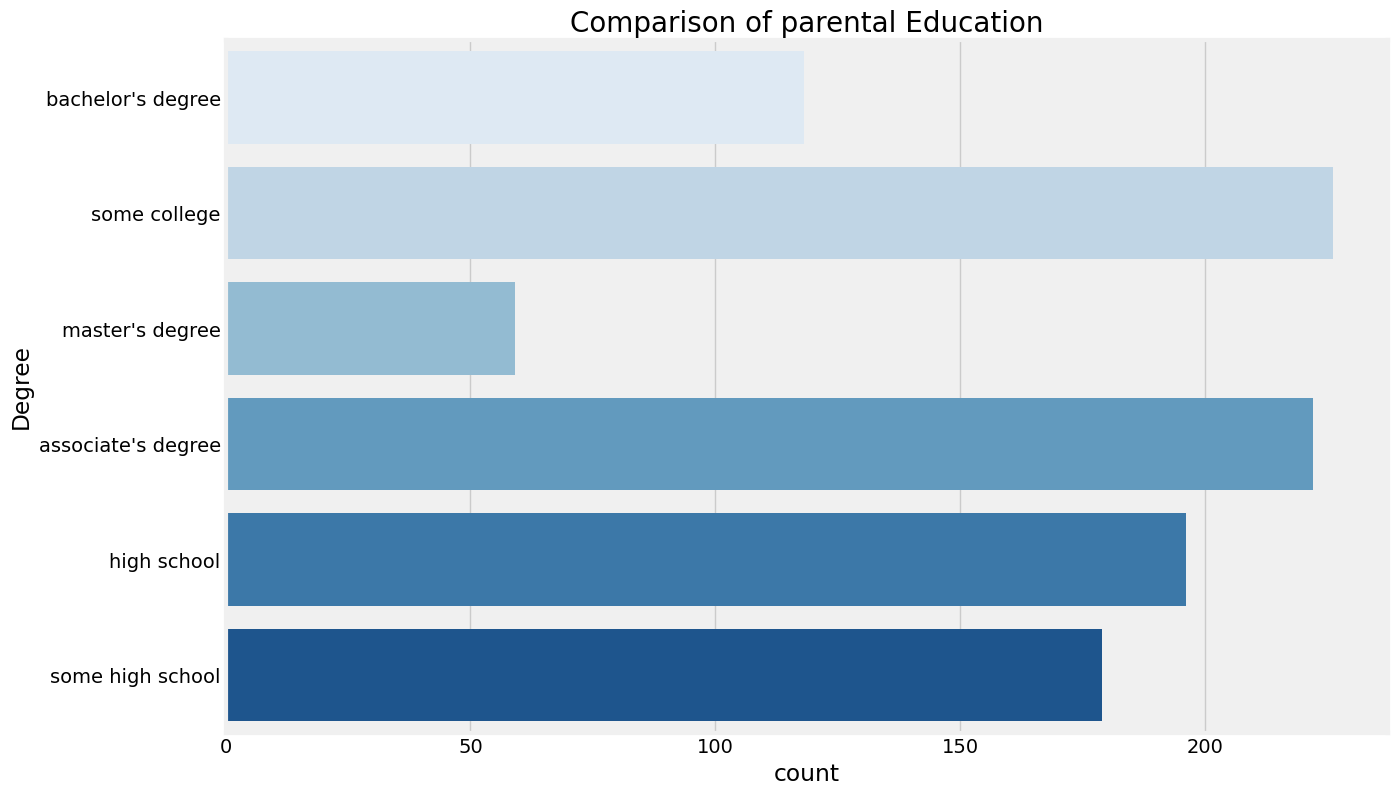

In [26]:
plt.figure(figsize=(15 , 9))
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'] , palette= 'Blues')
plt.title('Comparison of parental Education' , fontweight = 30 , fontsize = 20)
plt.xlabel('count')
plt.ylabel('Degree')
plt.show()

### Insight

- Largest number of parents are from some college

### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance?)

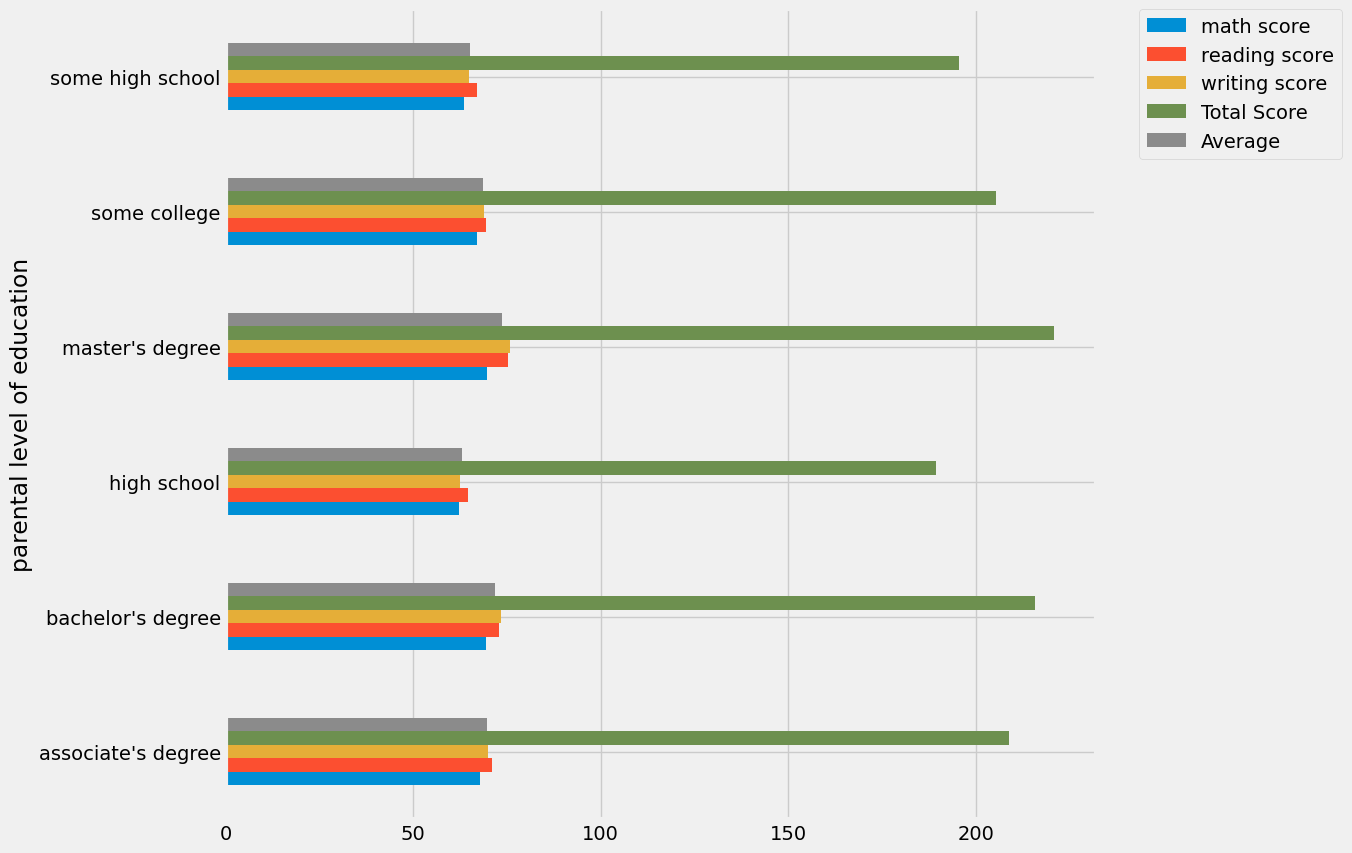

In [27]:
v = df.groupby('parental level of education')[df.select_dtypes(include='number').columns].mean().plot(
    kind='barh', figsize=(10,10)
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


### Insight

- The score of student whose parents possess master and bachelor level education are hgher than others

## Lunch Column

- Which type of lunch is most common amoung students?
- What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS (Which type of lunch is most common among students?)

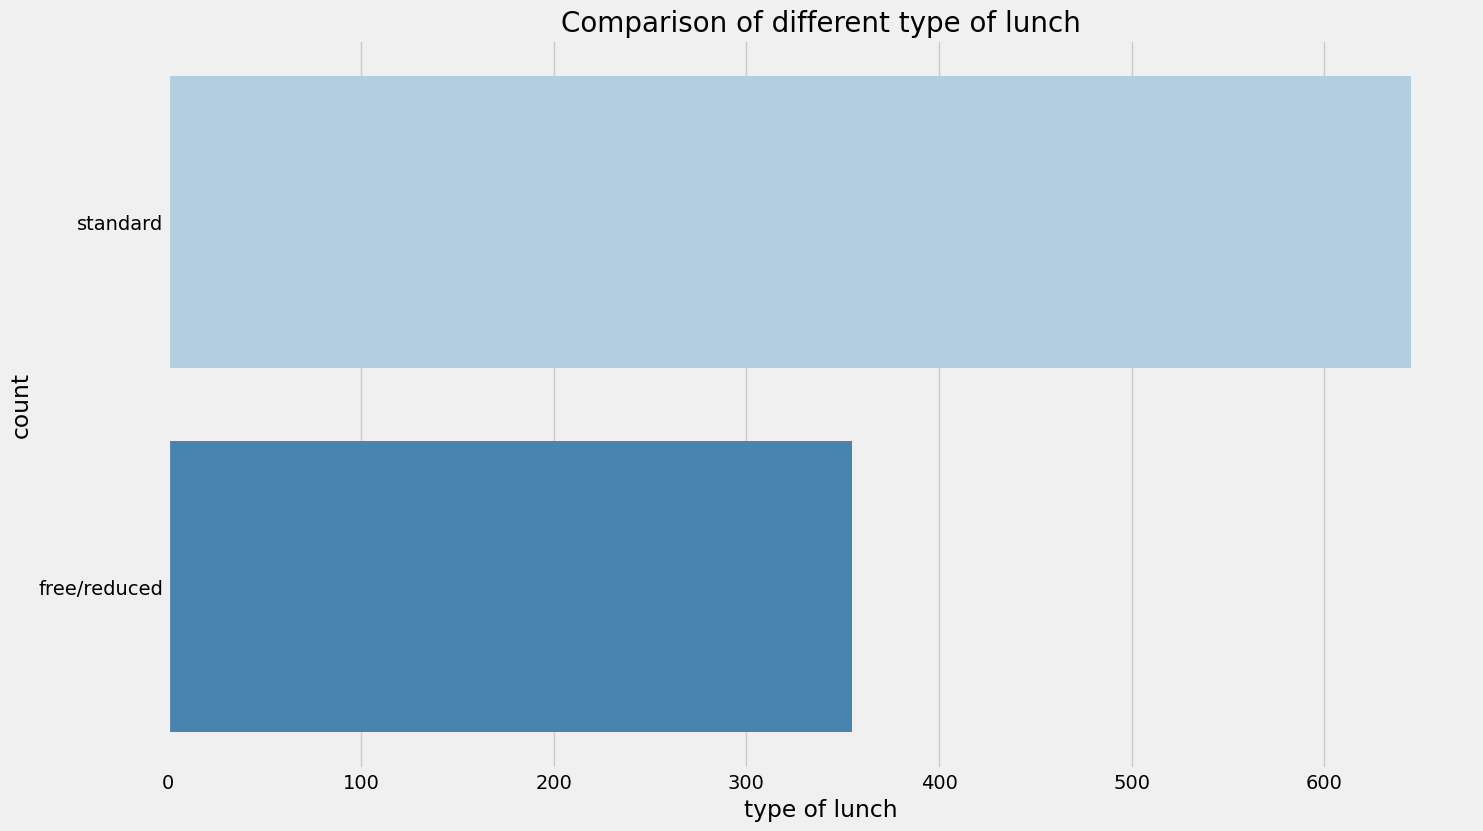

In [28]:
plt.figure(figsize=(15 , 9))
plt.style.use('fivethirtyeight')
sns.countplot(df['lunch'] , palette= 'Blues')
plt.title('Comparison of different type of lunch' , fontweight = 30 , fontsize = 20)
plt.xlabel('type of lunch')
plt.ylabel('count')
plt.show()

#### Insight

- Students being served lunch was more than free lunch

### BIVARIATE ANALYSIS (Is lunch type intake has any impact on student's performance?)

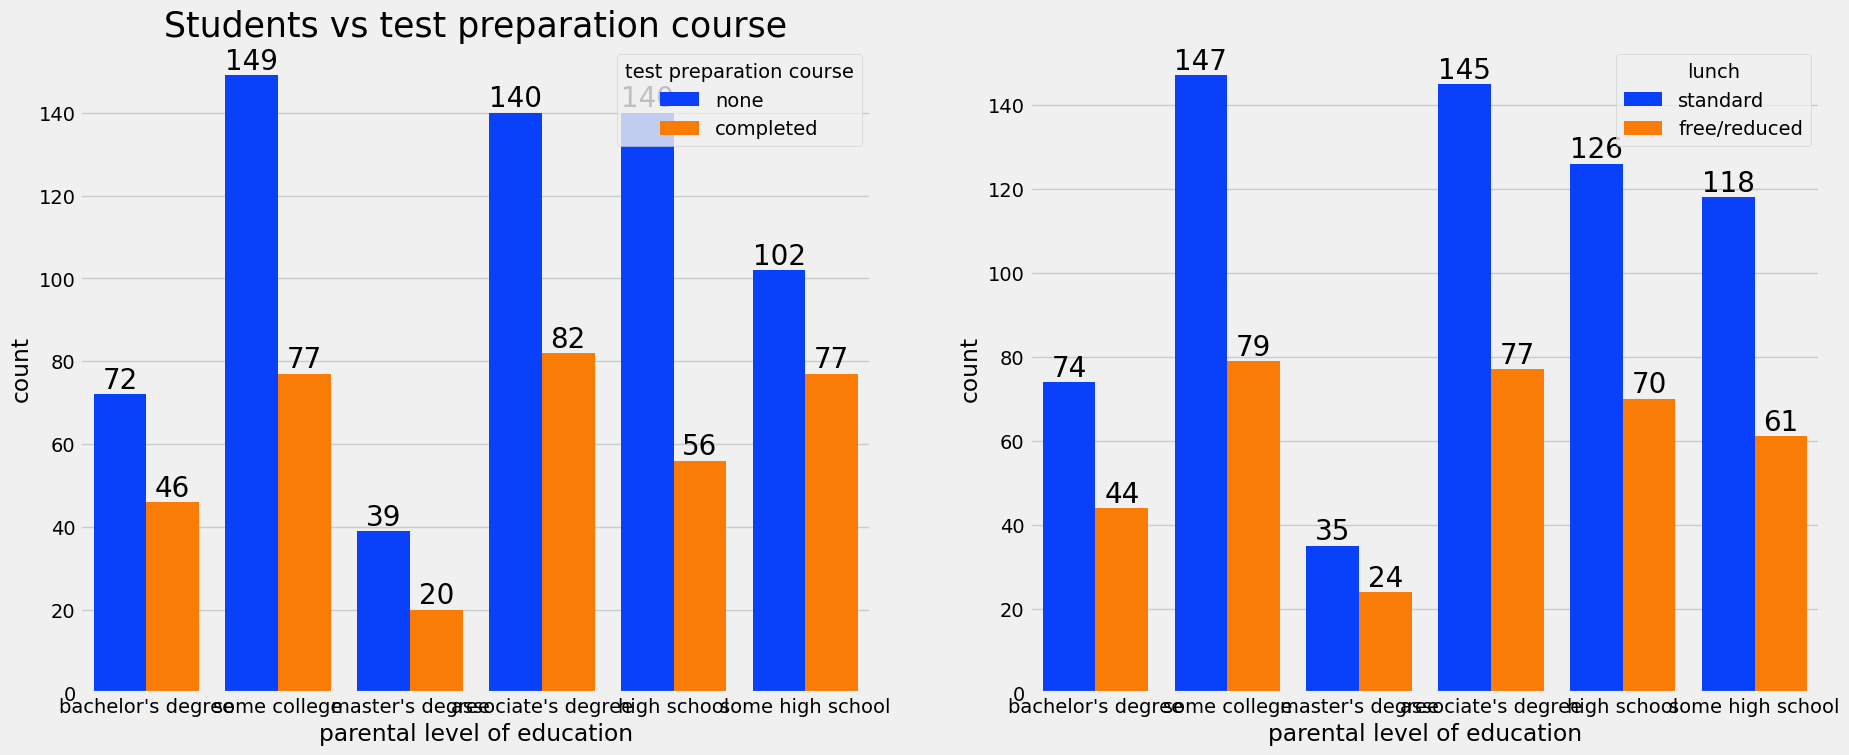

In [29]:
f, ax = plt.subplots(1 , 2 , figsize=(20 , 8))
sns.countplot(x=df['parental level of education'] , data=df , palette= 'bright' , hue= 'test preparation course' , saturation=0.95 , ax=ax[0])
ax[0].set_title('Students vs test preparation course' , color= 'black' , size=25)
for container in ax[0].containers:
    ax[0].bar_label(container , color='black' , size=20)

sns.countplot(x=df['parental level of education'] , data=df , palette= 'bright' , hue= 'lunch' , saturation=0.95 , ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container , color='black' , size=20)


### Insight

- Students who get Standard lunch tend to perform better than students who got free/reduced lunch

### Test Preparation Course

- Is Test preparation course has anay impact on student's performance?

<Axes: xlabel='lunch', ylabel='writing score'>

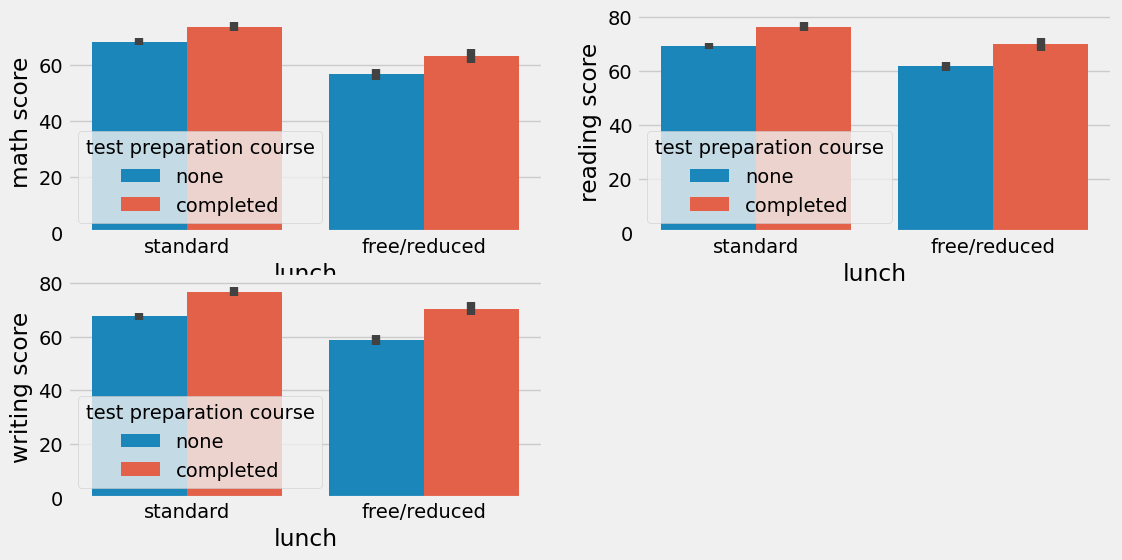

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(2 , 2 , 1)
sns.barplot(x=df['lunch'] , y=df['math score'] , hue=df['test preparation course'])
plt.subplot(2 , 2 , 2)
sns.barplot(x=df['lunch'] , y=df['reading score'] , hue=df['test preparation course'])
plt.subplot(2 , 2 , 3)
sns.barplot(x=df['lunch'] , y=df['writing score'] , hue=df['test preparation course'])

### Insight

- Students who have completed the Test Preparation Course have scores higher in all three categories than those who haven't taken the course

## Checking Outliers

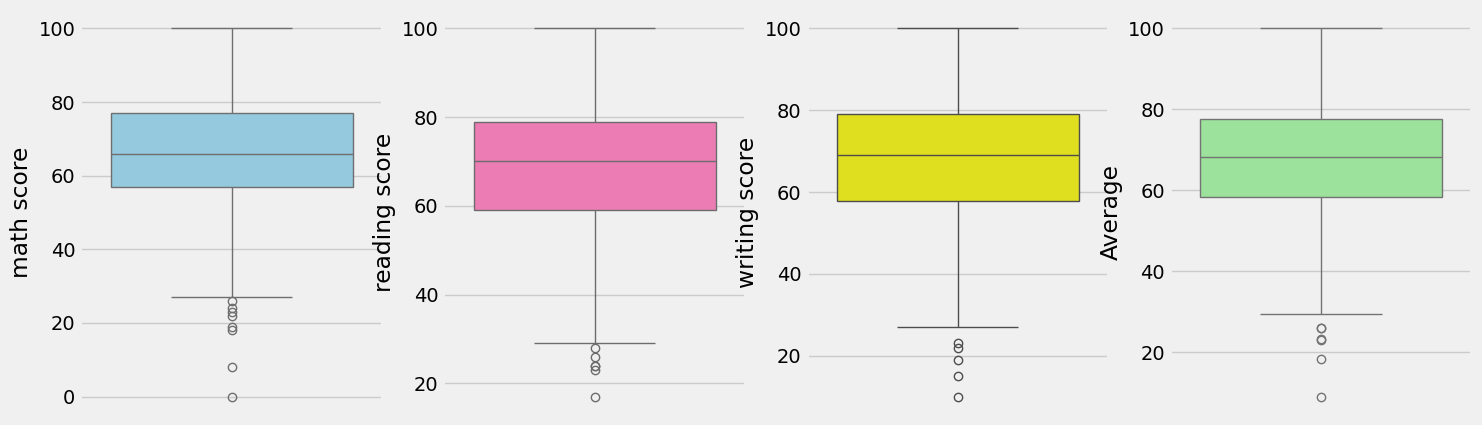

In [31]:
plt.subplots(1 , 4 , figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'] , color= 'skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'] , color= 'hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'] , color= 'yellow')
plt.subplot(144)
sns.boxplot(df['Average'] , color= 'lightgreen')
plt.show()

## MULTIVARIATE ANALYSIS using pairplot

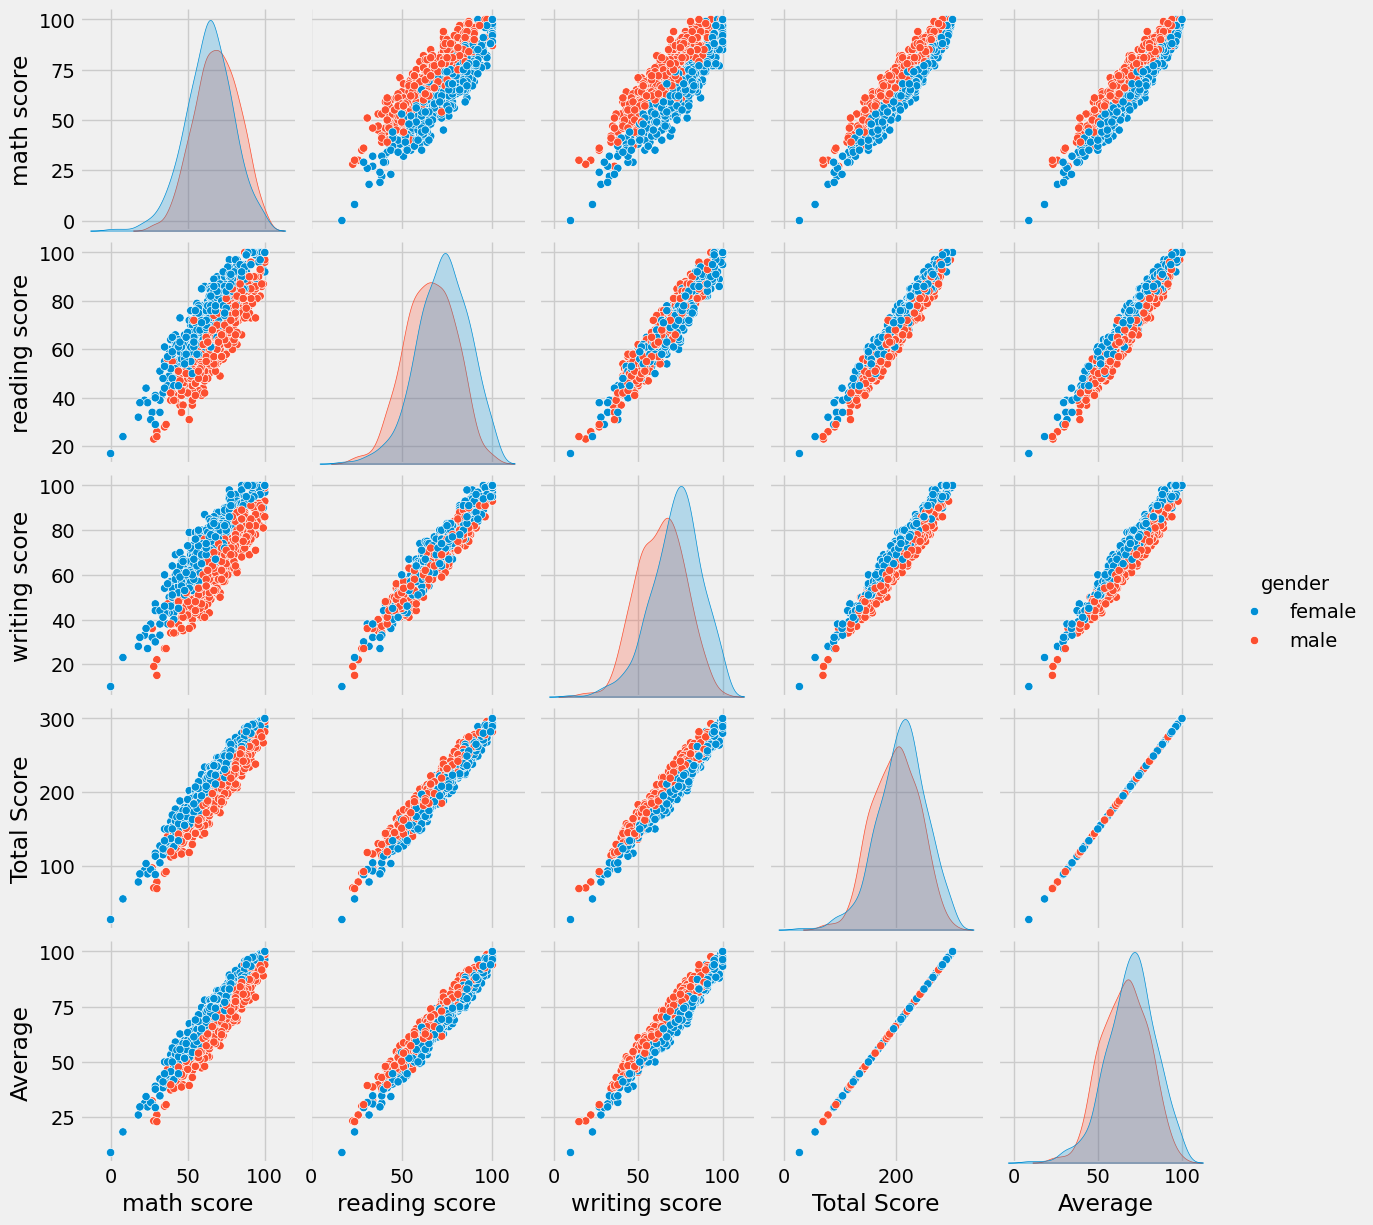

In [32]:
sns.pairplot(data=df , hue='gender')
plt.show()

### Insight

- From the above plot it is clear that all the scores increase linearly with each other

## Conclusion

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scores
- Student's Performance is not much related with test preparation course
- Finishing preparation course is beneficial